# Introducción

El análisis de regresión es una técnica estadística que nos permite examinar la relación entre una variable dependiente y una o más variables independientes. En este informe, utilizaremos el análisis de regresión para explorar la posibilidad de predecir el precio de un laptop a partir de sus componentes.

En particular, nos enfocaremos en el dataset seleccionado que contiene 12 variables relevantes para nuestro análisis: Company (compañía fabricante), Product (marca y modelo), TypeName (tipo de laptop), Inches (tamaño de pantalla), ScreenResolution (resolución de pantalla), CPU (modelo y fabricante del procesador), RAM (cantidad de memoria RAM y su unidad de medida), Memory (espacio de almacenamiento), GPU (marca y modelo de la tarjeta gráfica), OpSys (sistema operativo), Weight (peso del laptop y su unidad de medida) y Price Euros (precio en euros).

Nuestro objetivo es determinar qué variables tienen una mayor influencia en el precio de un laptop y cómo podemos utilizar esta información para mejorar la toma de decisiones en el ámbito de las compras de tecnología. A continuación, presentaremos nuestros hallazgos y conclusiones basados en nuestro análisis de regresión.

El dataset seleccionado consta de 12 variables que describen diferentes aspectos de los laptops:

1. Company (str): Nombre de la compañía fabricante del equipo.
2. Product (str): Marca y modelo del laptop.
3. TypeName (str): Tipo de laptop, que puede ser Notebook, Ultrabook, Gaming, entre otros.
4. Inches (float): Tamaño de la pantalla en pulgadas.
5. ScreenResolution (str): Resolución de la pantalla expresada como una cadena de texto que indica la cantidad de píxeles horizontales y verticales.
6. CPU (str): Modelo y fabricante del procesador.
7. RAM (str): Cantidad de memoria RAM del laptop y su unidad de medida (GB, MB, etc.).
8. Memory (str): Espacio de almacenamiento del laptop expresado en GB.
9. GPU (str): Marca y modelo de la tarjeta gráfica del laptop.
10. OpSys (str): Sistema operativo instalado en el laptop.
11. Weight (str): Peso del laptop expresado en kg junto con su unidad de medida.
12. Price Euros (float): Precio del laptop en euros.

Es importante tener en cuenta que cada una de estas variables puede influir en el precio final del laptop y, por lo tanto, son relevantes para nuestro análisis de regresión.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get and read the data

laptop_data = pd.read_csv('laptop_price.csv', encoding="latin-1")
laptop_data.head()
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


En este caso concreto contamos con 1303 filas en el dataset con ni una fila nula.

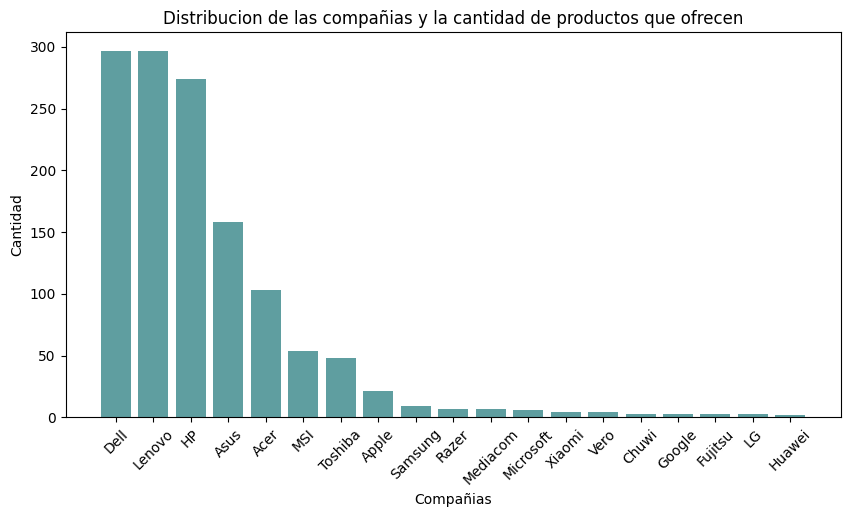

In [2]:
value_count_pct = laptop_data['Company'].value_counts()

# Make a plot for the distribution of the companies
plt.figure(figsize=(10, 5))
plt.bar(value_count_pct.index, value_count_pct.values, color='#5f9ea0')
plt.xticks(rotation=45)
plt.title("Distribucion de las compañias y la cantidad de productos que ofrecen")
plt.xlabel("Compañias")
plt.ylabel("Cantidad")
plt.show()

La mayoria de las laptops en el dataset, y ofrecidas en general por la compañia son en su mayoria de los fabricantes Dell, Lenovo, HP, ACER, MSI, Toshiba, esto se puede deber a la popularidad o exclusividad, o precios de los laptops de las marcas que menos laptops ofrecen en el mercado.

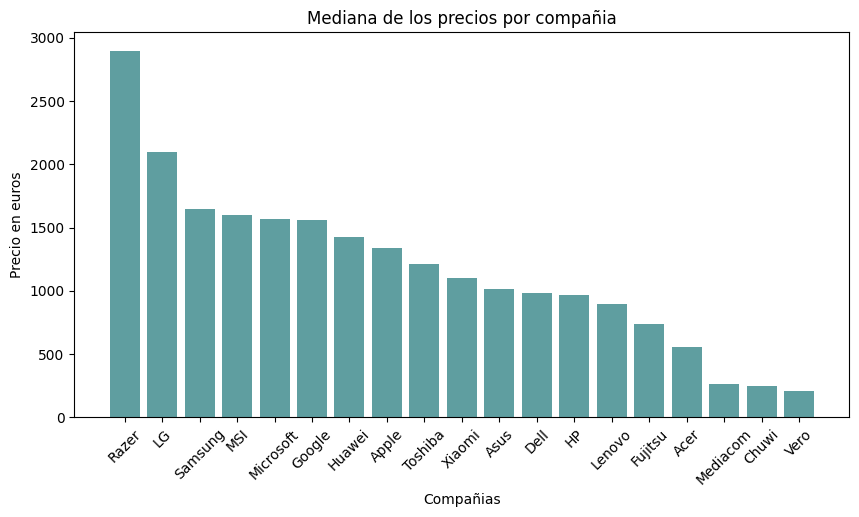

In [108]:
# Hipotesis, las compañias con menos productos ofrecidos tienen precios mas altos
# Agrupar por compañia
df_company_price = laptop_data.groupby('Company')['Price_euros'].median().sort_values(ascending=False)

# Hacer un grafico de barras para mostrar la mediana de los precios por compañia
plt.figure(figsize=(10, 5))
plt.bar(df_company_price.index, df_company_price.values, color='#5f9ea0')
plt.xticks(rotation=45)
plt.title("Mediana de los precios por compañia")
plt.xlabel("Compañias")
plt.ylabel("Precio en euros")
plt.show()

De los fabricantes razer es el que mayor precios tiene, esto puede deberse a la reputación de la marca y a que en su mayoria ofrece productos gaming.

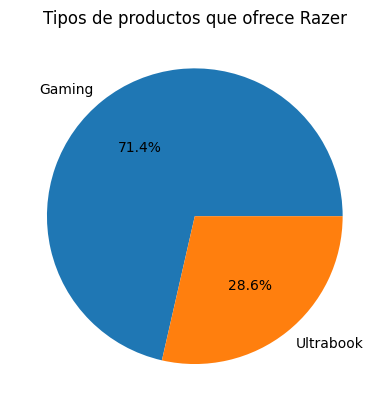

In [4]:
data = laptop_data.copy()
# Ver que tipo de productos ofrece razer
data.head()
data_razer = data.query("Company == 'Razer'")
razer_types = data_razer['TypeName'].value_counts()
plt.pie(razer_types.values, labels=razer_types.index, autopct='%1.1f%%')
plt.title("Tipos de productos que ofrece Razer")
plt.show()

[]

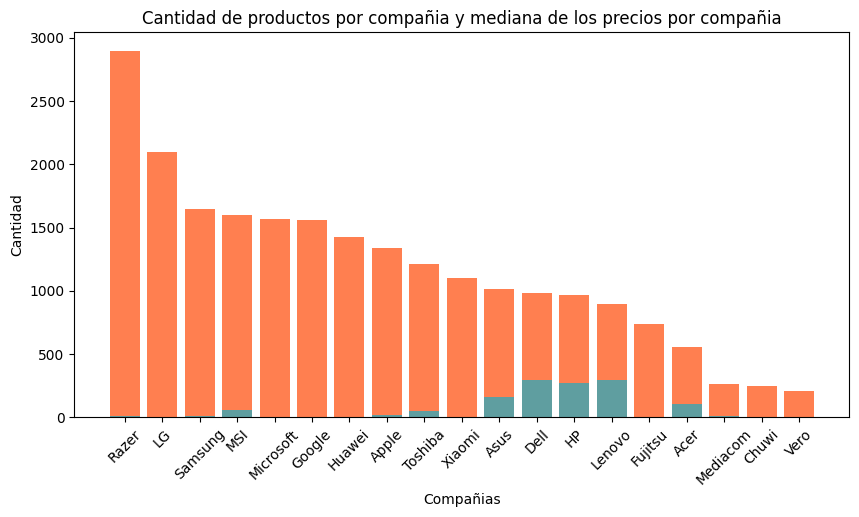

In [5]:
# Comprobar si existe una relación entre la cantidad de productos ofrecidos y el precio de los productos
# Agrupar por compañia
df_company_count = laptop_data.groupby('Company')['Product'].count().sort_values(ascending=False)
df_company_price = laptop_data.groupby('Company')['Price_euros'].median().sort_values(ascending=False)
# Hacer un grafico de barras apilado para mostrar la cantidad de productos por compañia
plt.figure(figsize=(10, 5))
plt.bar(df_company_price.index, df_company_price.values, color='#ff7f50')
plt.bar(df_company_count.index, df_company_count.values, color='#5f9ea0')
plt.xticks(rotation=45)
plt.title("Cantidad de productos por compañia y mediana de los precios por compañia")
plt.xlabel("Compañias")
plt.ylabel("Cantidad")
plt.plot()

No se observa una relación entre los precios y la cantidad de productos ofrecidos por las compañias por lo tanto la cantidad de productos ofrecidos no es una variable que nos ayude a explicar los precios.

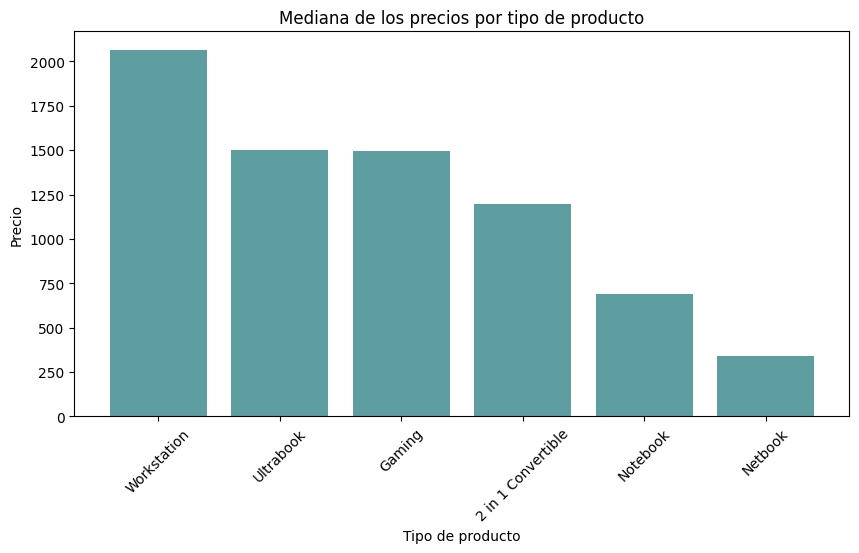

In [6]:
# Vamos a ver si el tipo de producto influye en el precio
# Agrupar por tipo de producto
df_type_price = laptop_data.groupby('TypeName')['Price_euros'].median().sort_values(ascending=False)
# Hacer un grafico de barras para mostrar la mediana de los precios por tipo de producto
plt.figure(figsize=(10, 5))
plt.bar(df_type_price.index, df_type_price.values, color='#5f9ea0')
plt.xticks(rotation=45)
plt.title("Mediana de los precios por tipo de producto")
plt.xlabel("Tipo de producto")
plt.ylabel("Precio")
plt.show()

El tipo de laptop afecta al precio, Por lo tanto, es una variable que tenemos que conservar dentro de nuestro dataset.

Las pulgadas de la pantalla parece no tener mucha relación con el precio.

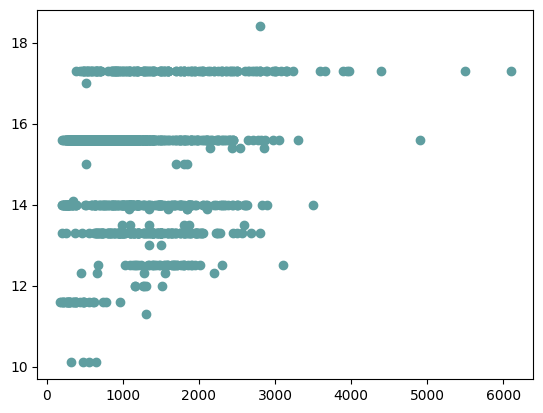

In [7]:
plt.scatter(laptop_data['Price_euros'], laptop_data['Inches'], color='#5f9ea0')

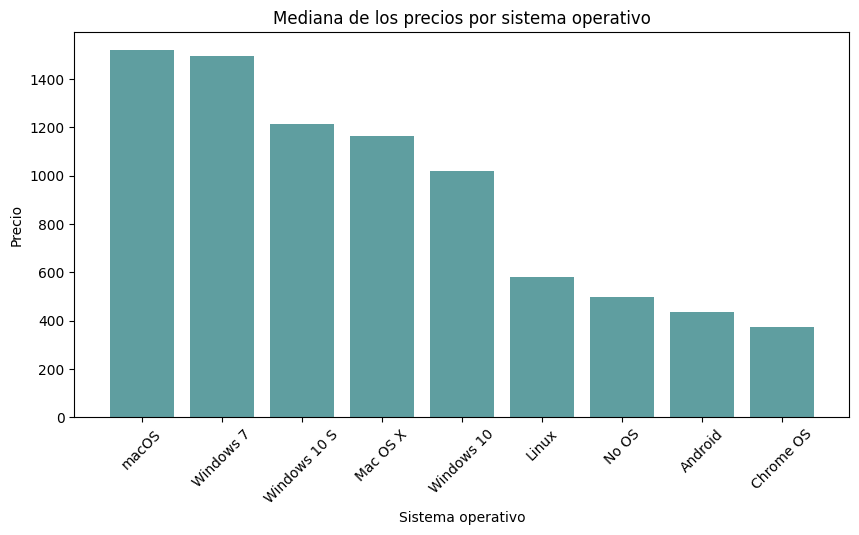

In [8]:
# Vamos a ver los precios por sistema operativo
# Agrupar por sistema operativo
df_os_price = laptop_data.groupby('OpSys')['Price_euros'].median().sort_values(ascending=False)
# Hacer un grafico de barras para mostrar la mediana de los precios por sistema operativo
plt.figure(figsize=(10, 5))
plt.bar(df_os_price.index, df_os_price.values, color='#5f9ea0')
plt.xticks(rotation=45)
plt.title("Mediana de los precios por sistema operativo")
plt.xlabel("Sistema operativo")
plt.ylabel("Precio")
plt.show()

A simple vista el sistema operativo si tiene una influencia grande en el precio del laptop

# Data Cleaning

In [83]:
import re
# Vamos a convertir la variable RAM en una variable numerica
pattern = r"\d+"
data_clean = laptop_data.copy()

def convert_ram_to_int(x):
    pattern_num = r"\d+"
    pattern_unit = r"\D+"
    num = int(re.findall(pattern_num, x)[0])
    unit = re.findall(pattern_unit, x)[0]
    if unit == 'GB':
        return num * 1000
    else:
        return num
data_clean['Ram in MB'] = data_clean['Ram'].apply(convert_ram_to_int)

print(data_clean['Ram in MB'].describe().to_markdown())

|       |   Ram in MB |
|:------|------------:|
| count |     1303    |
| mean  |     8382.19 |
| std   |     5084.66 |
| min   |     2000    |
| 25%   |     4000    |
| 50%   |     8000    |
| 75%   |     8000    |
| max   |    64000    |


De 1303 observaciones. 
- En promedio se tiene al rededor de 8GB de RAM. 
- Los valores estan dispersos en al rededor de 5GB para cada categoria.
- El Laptop con menos memoria RAM tiene 2GB.
- El laptop con mas memoria RAM tiene 64GB.
- El 25% de los laptops tienen 4GB de RAM o menos.
- El 75% de los laptops tienen 8GB de RAM o menos.
- La mayoria de las laptops tienen 8GB de RAM o menos.
- Una pequeña parte de las laptops ofrecidas tienen 16 GB de RAM

In [84]:
# Separar la variable Screen Resolution en dos variales, por un lado la resolución y por otro la tecnología
def split_screen_resolution(x):
    # Capture the resolution {int}x{int}
    pattern_res = r"(\d+x\d+)"
    tech, res = re.split(pattern_res, x)[:2]
    feature = None
    if len(tech.split("/")) == 2:
        tech, feature = tech.split("/")
        return tech, res, feature
    return tech if tech else "Unknown",res, feature if feature else "No feature"

resolution = []
technology = []
features = []

for element in data_clean['ScreenResolution']:
    tech, res, feature = split_screen_resolution(element)
    resolution.append(res)
    technology.append(tech)
    features.append(feature)

screen_data = pd.DataFrame({'screen_resolution': resolution, 'screen_technology': technology, 'screen_feature': features})
data_clean = data_clean.join(screen_data)

In [85]:
data_clean["gpu_vendor"] = data_clean["Gpu"].apply(lambda x: x.split()[0])

def data_weight_to_int(x):
    x = x.lower().replace("kg", "")
    return float(x) * 1000

data_clean['Weight in grams'] = data_clean['Weight'].apply(data_weight_to_int).astype(int)

data_clean.head()

def disk_size_to_int(x):
    size, type_ = x.split(" ", 1)
    if "GB" in size:
        size = int(size.replace("GB", "")) * 1_000
    elif "TB" in size:
        size = float(size.replace("TB", "")) * 1_000_000
    return int(size), type_

disk_size = []
disk_type = []

for element in data_clean['Memory']:
    size, type_ = disk_size_to_int(element)
    disk_size.append(size)
    disk_type.append(type_)

disk_data = pd.DataFrame({'disk_size': disk_size, 'disk_type': disk_type})
data_clean = data_clean.join(disk_data)

In [86]:
data_clean.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_euros,Ram in MB,screen_resolution,screen_technology,screen_feature,gpu_vendor,Weight in grams,disk_size,disk_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,1.37kg,1339.69,8000,2560x1600,IPS Panel Retina Display,No feature,Intel,1370,128000,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,1.34kg,898.94,8000,1440x900,Unknown,No feature,Intel,1340,128000,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,1.86kg,575.00,8000,1920x1080,Full HD,No feature,Intel,1860,256000,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,1.83kg,2537.45,16000,2880x1800,IPS Panel Retina Display,No feature,AMD,1830,512000,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,1.37kg,1803.60,8000,2560x1600,IPS Panel Retina Display,No feature,Intel,1370,256000,SSD


In [87]:
data_clean['cpu_vendor'] = data_clean['Cpu'].apply(lambda x: x.split()[0])

data_clean.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Price_euros,Ram in MB,screen_resolution,screen_technology,screen_feature,gpu_vendor,Weight in grams,disk_size,disk_type,cpu_vendor
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,1339.69,8000,2560x1600,IPS Panel Retina Display,No feature,Intel,1370,128000,SSD,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,898.94,8000,1440x900,Unknown,No feature,Intel,1340,128000,Flash Storage,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,575.00,8000,1920x1080,Full HD,No feature,Intel,1860,256000,SSD,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,2537.45,16000,2880x1800,IPS Panel Retina Display,No feature,AMD,1830,512000,SSD,Intel
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,1803.60,8000,2560x1600,IPS Panel Retina Display,No feature,Intel,1370,256000,SSD,Intel


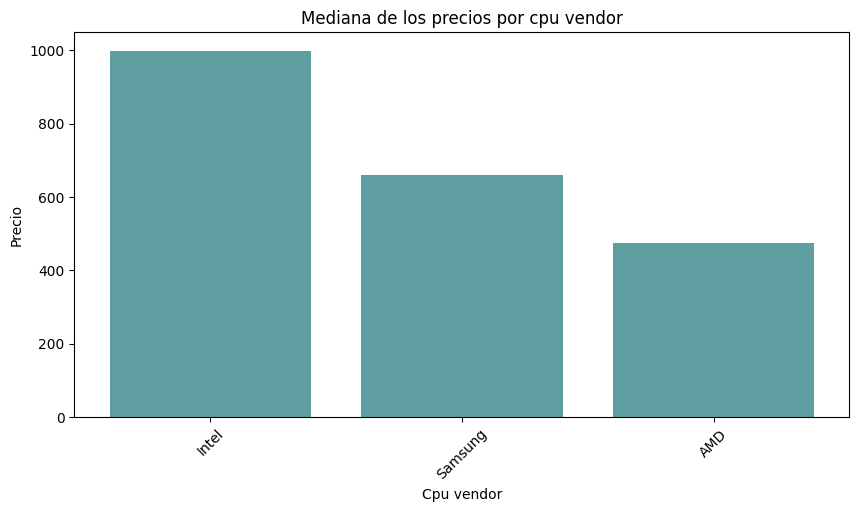

In [88]:
# Graficamos el cpu vendor vs el precio
df_cpu_vendor_price = data_clean.groupby('cpu_vendor')['Price_euros'].median().sort_values(ascending=False)
# Hacer un grafico de barras para mostrar la mediana de los precios por cpu vendor
plt.figure(figsize=(10, 5))
plt.bar(df_cpu_vendor_price.index, df_cpu_vendor_price.values, color='#5f9ea0')
plt.xticks(rotation=45)
plt.title("Mediana de los precios por cpu vendor")
plt.xlabel("Cpu vendor")
plt.ylabel("Precio")
plt.show()

Al parecer el CPU Vendor tiene una gran influencia en el precio

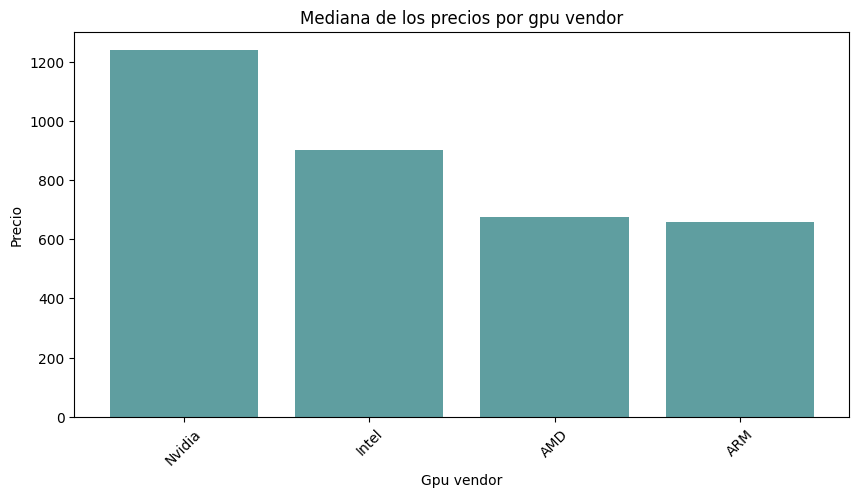

In [89]:
# Graficamos el gpu vendor vs el precio
df_gpu_vendor_price = data_clean.groupby('gpu_vendor')['Price_euros'].median().sort_values(ascending=False)
# Hacer un grafico de barras para mostrar la mediana de los precios por gpu vendor
plt.figure(figsize=(10, 5))
plt.bar(df_gpu_vendor_price.index, df_gpu_vendor_price.values, color='#5f9ea0')
plt.xticks(rotation=45)
plt.title("Mediana de los precios por gpu vendor")
plt.xlabel("Gpu vendor")
plt.ylabel("Precio")
plt.show()

In [90]:
# Vamos a proceder a eliminar las columnas que no vamos a utilizar y procesar las que vamos a utilizar

data_clean.columns
df_final = data_clean.drop(columns=[
    "laptop_ID", "ScreenResolution", "Cpu", "Gpu", "Weight", "Ram", "Memory", "Product", "OpSys"
])

In [91]:
data_clean["OpSys"]

0            macOS
1            macOS
2            No OS
3            macOS
4            macOS
           ...    
1298    Windows 10
1299    Windows 10
1300    Windows 10
1301    Windows 10
1302    Windows 10
Name: OpSys, Length: 1303, dtype: object

In [92]:
df_final.head()

,Company,TypeName,Inches,Price_euros,Ram in MB,screen_resolution,screen_technology,screen_feature,gpu_vendor,Weight in grams,disk_size,disk_type,cpu_vendor
0,Apple,Ultrabook,13.3,1339.69,8000,2560x1600,IPS Panel Retina Display,No feature,Intel,1370,128000,SSD,Intel
1,Apple,Ultrabook,13.3,898.94,8000,1440x900,Unknown,No feature,Intel,1340,128000,Flash Storage,Intel
2,HP,Notebook,15.6,575.00,8000,1920x1080,Full HD,No feature,Intel,1860,256000,SSD,Intel
3,Apple,Ultrabook,15.4,2537.45,16000,2880x1800,IPS Panel Retina Display,No feature,AMD,1830,512000,SSD,Intel
4,Apple,Ultrabook,13.3,1803.60,8000,2560x1600,IPS Panel Retina Display,No feature,Intel,1370,256000,SSD,Intel


In [93]:
# Convertimos las variables categoricas en variables dummy
df_final = pd.get_dummies(df_final, columns=[
    "Company", "TypeName", "screen_technology", "screen_resolution", "screen_technology",
    "screen_feature", "gpu_vendor", "disk_type", "cpu_vendor"])


In [94]:
import statsmodels.api as sm

X = df_final.drop(columns=["Price_euros"])
y = df_final["Price_euros"]

lm = sm.OLS(y, X).fit()

X = df_final.drop(columns=["Price_euros"])
y = df_final["Price_euros"]

lm2 = sm.OLS(y, X).fit()
print(lm2.summary().tables[1].as_text())

                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Inches                                        -54.7801     16.319     -3.357      0.001     -86.796     -22.764
Ram in MB                                       0.0610      0.003     21.169      0.000       0.055       0.067
Weight in grams                                 0.2018      0.035      5.728      0.000       0.133       0.271
disk_size                                    3.802e-05   5.03e-05      0.756      0.450   -6.07e-05       0.000
Company_Acer                                 -209.1978     53.583     -3.904      0.000    -314.322    -104.074
Company_Apple                                 136.6596    318.686      0.429      0.668    -488.565     761.884
Company_Asus                                 -100.4540     50.099     -2.005      0.045    -198.743     

Text(0, 0.5, 'Frecuencia')

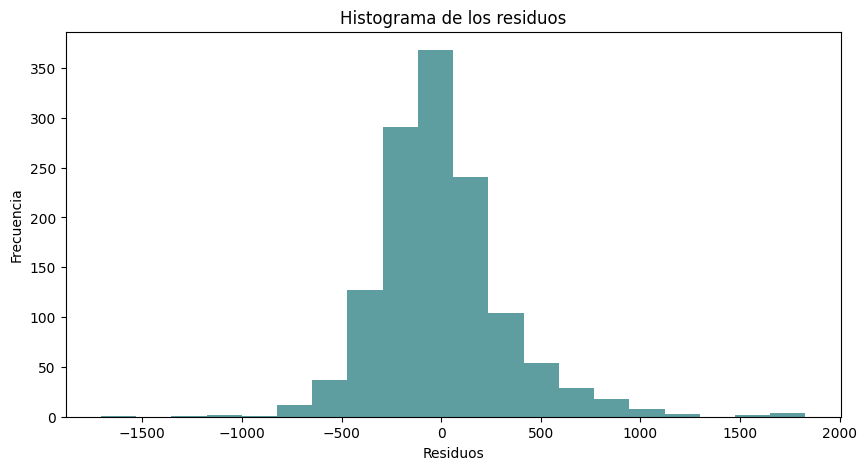

In [95]:
# Histograma de los residuos
plt.figure(figsize=(10, 5))
plt.hist(lm2.resid, bins=20, color='#5f9ea0')
plt.title("Histograma de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")

Que los errores estén normalmente distribuidos significa que el modelo es una buena aproximación para explicar los datos. Y los parámetros del modelo se ajustan bien a la estructura. A pesar de que no garantiza que el modelo sea adecuado, es un buen punto de partida

In [96]:
threshold = .05
columns_to_keep = ["Price_euros"]
for index, value in zip(lm2.pvalues.index, lm2.pvalues.values):
    if value <= threshold:
        columns_to_keep.append(index)

df_final = df_final[columns_to_keep]
df_final.head()

lm3 = sm.OLS(y, X).fit()
print(lm3.summary().tables[1].as_text())

                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Inches                                        -54.7801     16.319     -3.357      0.001     -86.796     -22.764
Ram in MB                                       0.0610      0.003     21.169      0.000       0.055       0.067
Weight in grams                                 0.2018      0.035      5.728      0.000       0.133       0.271
disk_size                                    3.802e-05   5.03e-05      0.756      0.450   -6.07e-05       0.000
Company_Acer                                 -209.1978     53.583     -3.904      0.000    -314.322    -104.074
Company_Apple                                 136.6596    318.686      0.429      0.668    -488.565     761.884
Company_Asus                                 -100.4540     50.099     -2.005      0.045    -198.743     

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_final.drop(columns=["Price_euros"])
y = df_final["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error, r2_score

y_pred = lm5.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  134566.11701653368
R2:  0.7350677500487


In [99]:
threshold = .001
print("Variables mas influyentes en el precio")
for index, value in zip(lm3.pvalues.index, lm.pvalues):
    if value <= threshold:
        print(index)
    

Inches
Ram in MB
Weight in grams
Company_Acer
Company_LG
Company_Razer
TypeName_Ultrabook
TypeName_Workstation
screen_technology_4K Ultra HD 
screen_technology_IPS Panel 4K Ultra HD 
screen_resolution_2560x1440
screen_technology_4K Ultra HD 
screen_technology_IPS Panel 4K Ultra HD 
gpu_vendor_Intel
gpu_vendor_Nvidia
cpu_vendor_AMD
cpu_vendor_Intel


In [109]:
from collections import defaultdict

regression_coeffs = defaultdict(list)

for col, alpha in zip(X.columns, lm5.coef_):
    regression_coeffs['Variable Name'].append(col)
    regression_coeffs['Regression Coefficient'].append(alpha)

df_regression_coeffs = pd.DataFrame(regression_coeffs)

In [110]:
df_regression_coeffs

,Variable Name,Regression Coefficient
0,Inches,-55.864625
1,Ram in MB,0.063989
2,Weight in grams,0.154650
3,Company_Acer,-216.219168
4,Company_Asus,-98.315581
5,Company_LG,623.903966
6,Company_Mediacom,-315.566238
7,Company_Microsoft,132.342031
8,Company_Razer,790.669389
9,Company_Toshiba,152.497228


In [117]:
df_company_price = laptop_data.groupby('Company')
companies = df_company_price['Company'].unique().index.tolist()

df_company_price['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Acer,103.0,626.775825,375.671363,174.00,385.5000,559.00,774.5000,2599.00
Apple,21.0,1564.198571,561.623595,898.94,1163.0000,1339.69,1958.9000,2858.00
Asus,158.0,1104.169367,702.490232,191.90,537.2500,1012.50,1488.2500,3975.00
Chuwi,3.0,314.296667,116.672889,244.99,246.9450,248.90,348.9500,449.00
Dell,297.0,1186.068990,672.941227,274.90,735.0700,985.00,1472.2000,3659.40
Fujitsu,3.0,729.000000,75.498344,649.00,694.0000,739.00,769.0000,799.00
Google,3.0,1677.666667,473.292017,1275.00,1417.0000,1559.00,1879.0000,2199.00
HP,274.0,1067.774854,617.508031,209.00,615.9975,966.50,1389.0000,4389.00
Huawei,2.0,1424.000000,106.066017,1349.00,1386.5000,1424.00,1461.5000,1499.00


Company
Acer              [Acer]
Apple            [Apple]
Asus              [Asus]
Chuwi            [Chuwi]
Dell              [Dell]
Fujitsu        [Fujitsu]
Google          [Google]
HP                  [HP]
Huawei          [Huawei]
LG                  [LG]
Lenovo          [Lenovo]
MSI                [MSI]
Mediacom      [Mediacom]
Microsoft    [Microsoft]
Razer            [Razer]
Samsung        [Samsung]
Toshiba        [Toshiba]
Vero              [Vero]
Xiaomi          [Xiaomi]
Name: Company, dtype: object